                                                        Tyroid Cancer Detection

Disclaimer

Objective

What is Malignand & Benign Thyroid nodules?

Malignant:

Benign:

In [1]:
# importing all nessasory libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings("ignore")

In [5]:
#loading data from csv
df=pd.read_csv("thyroid_status_dataset.csv")

Dataset Description

Column Descriptions

In [8]:
# fetching structure of dataset
df.shape

(212691, 17)

In [9]:
# fetching top rows
df.head()

,Patient_ID,Age,Gender,Country,Ethnicity,Family_History,Radiation_Exposure,Iodine_Deficiency,Smoking,Obesity,Diabetes,TSH_Level,T3_Level,T4_Level,Nodule_Size,Thyroid_Cancer_Risk,Diagnosis
0,1,66,Male,Russia,Caucasian,No,Yes,No,No,No,No,9.37,1.67,6.16,1.08,Low,Benign
1,2,29,Male,Germany,Hispanic,No,Yes,No,No,No,No,1.83,1.73,10.54,4.05,Low,Benign
2,3,86,Male,Nigeria,Caucasian,No,No,No,No,No,No,6.26,2.59,10.57,4.61,Low,Benign
3,4,75,Female,India,Asian,No,No,No,No,No,No,4.10,2.62,11.04,2.46,Medium,Benign
4,5,35,Female,Germany,African,Yes,Yes,No,No,No,No,9.10,2.11,10.71,2.11,High,Benign


Data Cleaning & Preprocessing 

In [10]:
# checking information of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 212691 entries, 0 to 212690
Data columns (total 17 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Patient_ID           212691 non-null  int64  
 1   Age                  212691 non-null  int64  
 2   Gender               212691 non-null  object 
 3   Country              212691 non-null  object 
 4   Ethnicity            212691 non-null  object 
 5   Family_History       212691 non-null  object 
 6   Radiation_Exposure   212691 non-null  object 
 7   Iodine_Deficiency    212691 non-null  object 
 8   Smoking              212691 non-null  object 
 9   Obesity              212691 non-null  object 
 10  Diabetes             212691 non-null  object 
 11  TSH_Level            212691 non-null  float64
 12  T3_Level             212691 non-null  float64
 13  T4_Level             212691 non-null  float64
 14  Nodule_Size          212691 non-null  float64
 15  Thyroid_Cancer_Ri

In [11]:
# Checking for Null Values
df.isnull().sum()

Patient_ID             0
Age                    0
Gender                 0
Country                0
Ethnicity              0
Family_History         0
Radiation_Exposure     0
Iodine_Deficiency      0
Smoking                0
Obesity                0
Diabetes               0
TSH_Level              0
T3_Level               0
T4_Level               0
Nodule_Size            0
Thyroid_Cancer_Risk    0
Diagnosis              0
dtype: int64

In [12]:
# Filling missing Values in the age column with the mean age
df["Age"]=df["Age"].fillna(df["Age"].mean())

In [13]:
#Droping all rows with missing (NAN) values from the data set
df.dropna(inplace=True)

In [14]:
# Checking for Null Values
df.isnull().sum()

Patient_ID             0
Age                    0
Gender                 0
Country                0
Ethnicity              0
Family_History         0
Radiation_Exposure     0
Iodine_Deficiency      0
Smoking                0
Obesity                0
Diabetes               0
TSH_Level              0
T3_Level               0
T4_Level               0
Nodule_Size            0
Thyroid_Cancer_Risk    0
Diagnosis              0
dtype: int64

In [15]:
# Drop unnessasory columns (Patient_ID)
df.drop(columns="Patient_ID",axis=1,inplace=True)

Why i drop Patient_ID column?

In [16]:
df.head()

,Age,Gender,Country,Ethnicity,Family_History,Radiation_Exposure,Iodine_Deficiency,Smoking,Obesity,Diabetes,TSH_Level,T3_Level,T4_Level,Nodule_Size,Thyroid_Cancer_Risk,Diagnosis
0,66,Male,Russia,Caucasian,No,Yes,No,No,No,No,9.37,1.67,6.16,1.08,Low,Benign
1,29,Male,Germany,Hispanic,No,Yes,No,No,No,No,1.83,1.73,10.54,4.05,Low,Benign
2,86,Male,Nigeria,Caucasian,No,No,No,No,No,No,6.26,2.59,10.57,4.61,Low,Benign
3,75,Female,India,Asian,No,No,No,No,No,No,4.10,2.62,11.04,2.46,Medium,Benign
4,35,Female,Germany,African,Yes,Yes,No,No,No,No,9.10,2.11,10.71,2.11,High,Benign


In [17]:
#changing datatype of Age column from float to int
df["Age"]=df["Age"].astype(int)

In [18]:
#checking all unique ages in age column
df["Age"].unique()

array([66, 29, 86, 75, 35, 89, 38, 17, 36, 67, 16, 44, 52, 78, 74, 47, 72,
       63, 73, 56, 76, 61, 65, 69, 21, 87, 53, 32, 18, 28, 23, 85, 58, 22,
       49, 50, 64, 20, 68, 77, 48, 88, 62, 54, 40, 55, 43, 59, 79, 15, 25,
       19, 42, 26, 37, 51, 41, 57, 27, 46, 80, 71, 84, 70, 33, 82, 31, 83,
       30, 34, 81, 45, 39, 60, 24])

In [19]:
# seeing no of patients from each country
df["Country"].value_counts()

Country
India          42496
China          31978
Nigeria        31918
Brazil         21413
Russia         21297
Japan          16867
South Korea    14965
UK             10642
USA            10558
Germany        10557
Name: count, dtype: int64

In [20]:
#seeing no of patients from each ethenic baground
df["Ethnicity"].value_counts()

Ethnicity
Caucasian         63669
Asian             53261
African           42414
Hispanic          32012
Middle Eastern    21335
Name: count, dtype: int64

In [21]:
#Seeing Data Description
df.describe()

,Age,TSH_Level,T3_Level,T4_Level,Nodule_Size
count,212691.000000,212691.000000,212691.000000,212691.000000,212691.000000
mean,51.918497,5.045102,2.001727,8.246204,2.503403
std,21.632815,2.860264,0.866248,2.164188,1.444631
min,15.000000,0.100000,0.500000,4.500000,0.000000
25%,33.000000,2.570000,1.250000,6.370000,1.250000
50%,52.000000,5.040000,2.000000,8.240000,2.510000
75%,71.000000,7.520000,2.750000,10.120000,3.760000
max,89.000000,10.000000,3.500000,12.000000,5.000000


Data Analysis Through Q & A

Q 1 : What is Total Number of Patients?

In [23]:
Total_Patient=df["Age"].count()
Total_Patient

212691

Q 2 : What is the Average Age of Patient?

In [24]:
df["Age"].mean()

51.918496786417855

Q 3 : How Does The Average Age Differ by Type of cancer Dignosed with?

In [25]:
df.groupby("Diagnosis")["Age"].mean()

Diagnosis
Benign       51.917124
Malignant    51.923023
Name: Age, dtype: float64

Q 4 : How many patients are dignosed with malignant and benign thyroid cancer.

In [26]:
Total_Patient_by_Ctype=df["Diagnosis"].value_counts()
Total_Patient_by_Ctype

Diagnosis
Benign       163196
Malignant     49495
Name: count, dtype: int64

Q 5 : What is percentage of  patients dignosed with malignant and benign thyroid cancer.

In [27]:
parcent_of_patient_by_Ctype=(Total_Patient_by_Ctype/Total_Patient) * 100
parcent_of_patient_by_Ctype

Diagnosis
Benign       76.729152
Malignant    23.270848
Name: count, dtype: float64

Q 6 : How many Male and Female patients are Dignosed.

In [28]:
Total_Patient_by_Gender=df["Gender"].value_counts()
Total_Patient_by_Gender

Gender
Female    127527
Male       85164
Name: count, dtype: int64

Q 7 : per entage of Male and Female patients Dignosed with cancer.

In [29]:
parcent_of_patient_by_Gender=(Total_Patient_by_Gender/Total_Patient) * 100
parcent_of_patient_by_Gender

Gender
Female    59.958813
Male      40.041187
Name: count, dtype: float64

Q 8 : Risk Level of Thyroid Cancer Amoung the Patients.

In [30]:
Total_Patient_by_Rlevel=df["Thyroid_Cancer_Risk"].value_counts()
Total_Patient_by_Rlevel

Thyroid_Cancer_Risk
Low       108388
Medium     72400
High       31903
Name: count, dtype: int64

Q 9 : percent of Risk Level of Thyroid Cancer Amoung the Patients.

In [31]:
parcent_of_patient_by_Rlevel=(Total_Patient_by_Rlevel/Total_Patient) * 100
parcent_of_patient_by_Rlevel

Thyroid_Cancer_Risk
Low       50.960313
Medium    34.039992
High      14.999694
Name: count, dtype: float64

Q 10 : Rate of Malignant Cancer

In [32]:
Malignant_C=df[df['Diagnosis']=="Malignant"].shape[0]
Malignant_C

49495

In [33]:
R_M_C=(Malignant_C /Total_Patient)*100
R_M_C

23.270848319863088

Q 11 : Rate of  Benign Cancer

In [34]:
Benign_C=df[df['Diagnosis']=="Benign"].shape[0]
Benign_C

163196

In [35]:
R_B_C=(Benign_C /Total_Patient)*100
R_B_C

76.72915168013691

Data Visualization

Q 1 : What is the distribution of Malignant Vs Benign cases ?

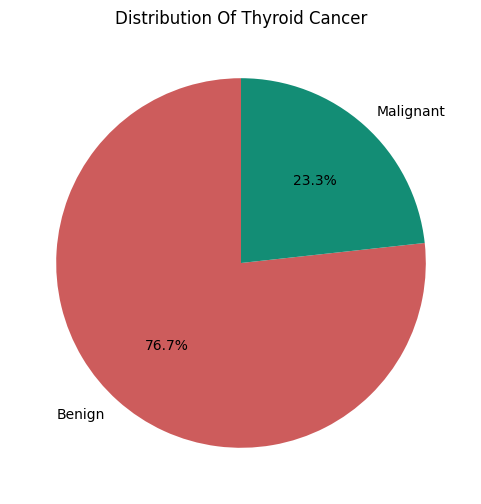

In [36]:
diagnosis_counts=df["Diagnosis"].value_counts()

plt.figure(figsize=(6,6))
plt.pie(diagnosis_counts,labels=diagnosis_counts.index,autopct="%1.1f%%",colors=["#CD5C5C","#138d75"],startangle=90)
plt.title("Distribution Of Thyroid Cancer")
plt.show()

Outcome:

Q : What is the distribution of gender ?

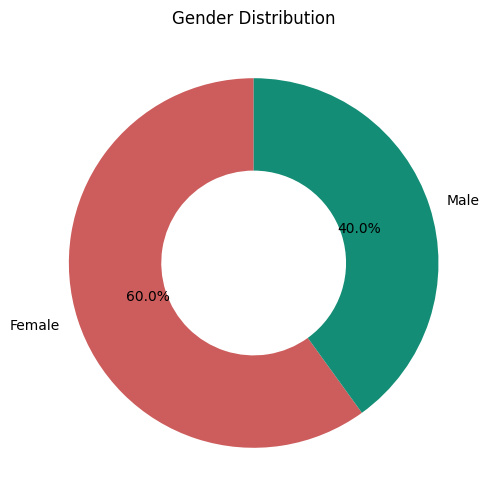

In [37]:
plt.figure(figsize=(6,6))
df["Gender"].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, wedgeprops=dict(width=0.5),colors=["#CD5C5C","#138d75"])
plt.title('Gender Distribution')
plt.ylabel("")
plt.show()

Outcome:

Q : Which Country has the max no of Thyroid Patients?

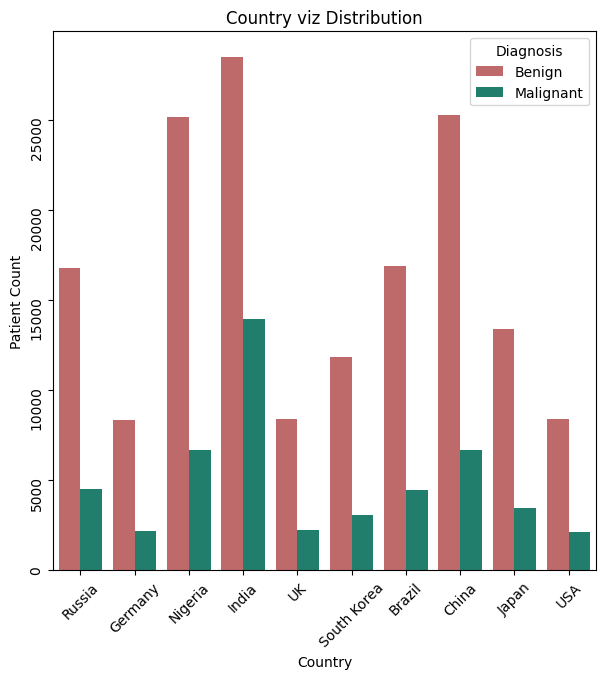

In [38]:
plt.figure(figsize=(7,7))
sns.countplot(data=df,x="Country",hue="Diagnosis",palette=["#CD5C5C","#138d75"])
plt.title("Country viz Distribution")
plt.xlabel("Country")
plt.ylabel("Patient Count")
plt.xticks(rotation=45)
plt.yticks(rotation=90)
plt.show()

Outcome:

Q : What is the Distribution of age across dataset?

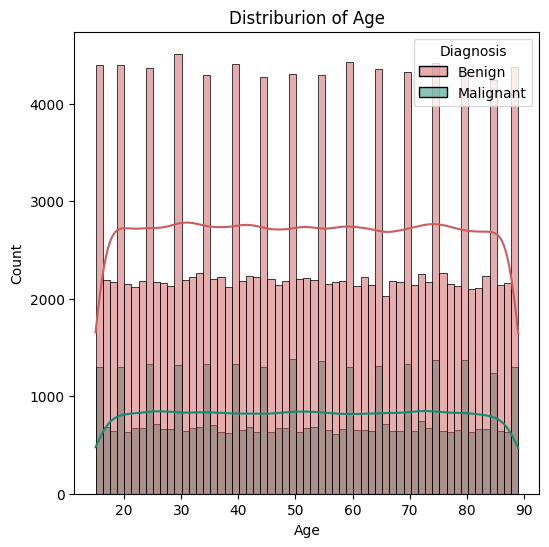

In [39]:
plt.figure(figsize=(6,6))
sns.histplot(data=df,x='Age',hue="Diagnosis",kde=True,palette=["#CD5C5C","#138d75"])
plt.title("Distriburion of Age")
plt.show()

Outcome:

Q : What is The Distribution of Thyroid Cancer Risk Among male & Female?

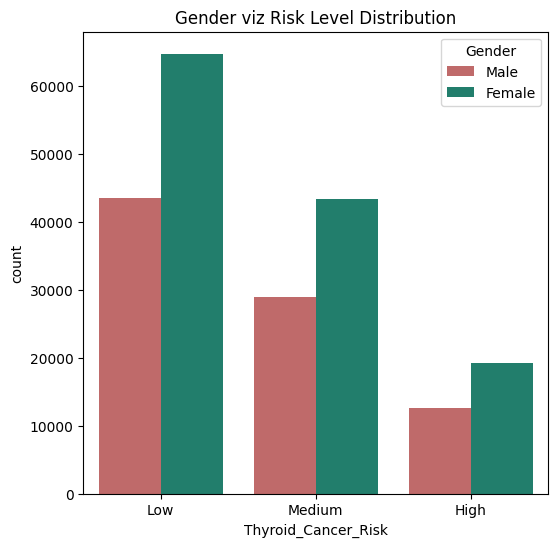

In [40]:
plt.figure(figsize=(6,6))
sns.countplot(data=df,x="Thyroid_Cancer_Risk",hue="Gender",palette=["#CD5C5C","#138d75"])
plt.title("Gender viz Risk Level Distribution")
plt.show()

Outcome:

Q : Is there any corelation between TSH Level T3 Level and T4 level?

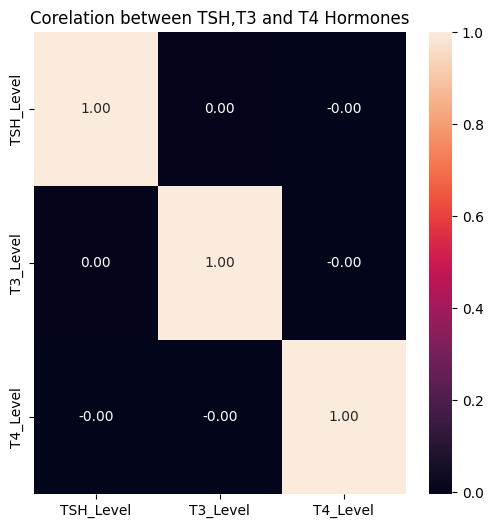

In [41]:
hormons_level=df[["TSH_Level","T3_Level","T4_Level"]]
cm=hormons_level.corr()

plt.figure(figsize=(6,6))
sns.heatmap(cm,annot=True,fmt=".2f")
plt.title("Corelation between TSH,T3 and T4 Hormones")
plt.show()

Outcome:

Q : What is a Distribution of Nodule size Across data?

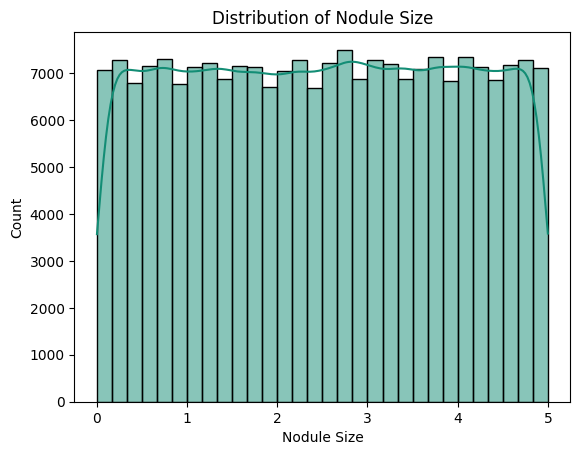

In [42]:
sns.histplot(df["Nodule_Size"], bins=30, kde=True,color="#138d75")
plt.title("Distribution of Nodule Size")
plt.xlabel("Nodule Size")
plt.ylabel("Count")
plt.show()

Outcome:

Q : What is the impact of Family History, Radiation Exposure, Iodine Deficiency, Smoking, Obesity and Diabetes on cancer risk?

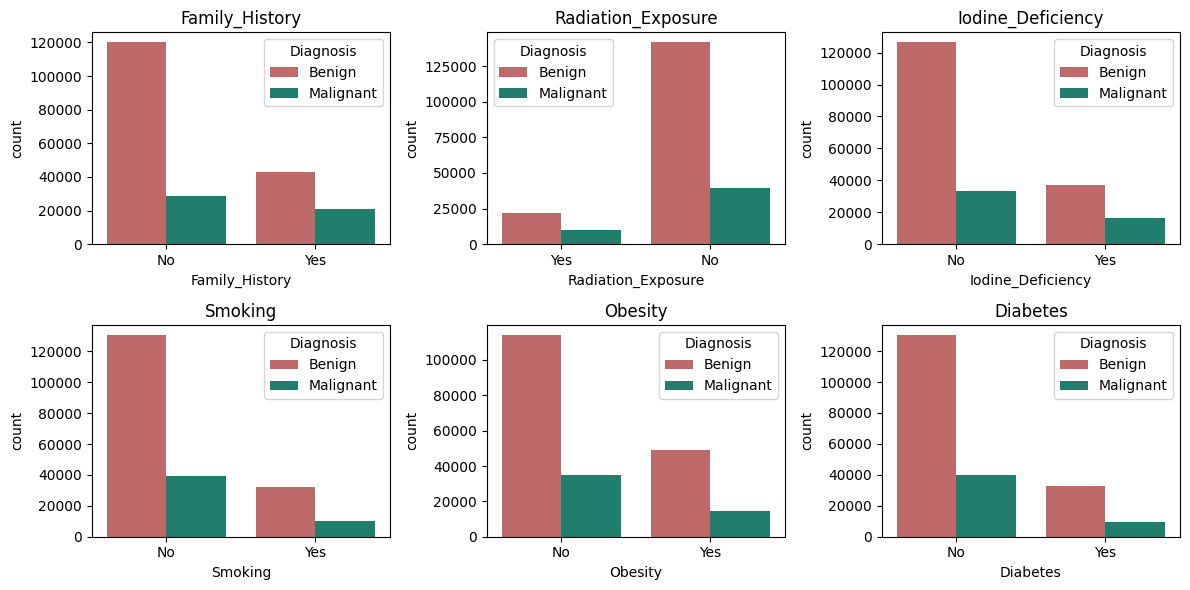

In [43]:
binary_cols = ["Family_History", "Radiation_Exposure", "Iodine_Deficiency", 
               "Smoking", "Obesity", "Diabetes"]

plt.figure(figsize=(12, 6))
for i, col in enumerate(binary_cols, 1):
    plt.subplot(2, 3, i)
    sns.countplot(x=df[col], hue=df["Diagnosis"],palette=["#CD5C5C","#138d75"])
    plt.title(col)
plt.tight_layout()
plt.show()

Outcome:

                                                              Machine Learning

Handling Catagorial Data of Dataset

In [44]:
#Seprating Catagorial and Numeric data
df_cat=df.select_dtypes(object )
df_num=df.select_dtypes([int,float])

In [45]:
df_cat

,Gender,Country,Ethnicity,Family_History,Radiation_Exposure,Iodine_Deficiency,Smoking,Obesity,Diabetes,Thyroid_Cancer_Risk,Diagnosis
0,Male,Russia,Caucasian,No,Yes,No,No,No,No,Low,Benign
1,Male,Germany,Hispanic,No,Yes,No,No,No,No,Low,Benign
2,Male,Nigeria,Caucasian,No,No,No,No,No,No,Low,Benign
3,Female,India,Asian,No,No,No,No,No,No,Medium,Benign
4,Female,Germany,African,Yes,Yes,No,No,No,No,High,Benign
...,...,...,...,...,...,...,...,...,...,...,...
212686,Female,India,Asian,No,No,No,No,Yes,No,Low,Benign
212687,Male,Japan,Middle Eastern,No,No,No,No,Yes,No,Medium,Benign
212688,Female,Nigeria,Hispanic,No,No,No,No,No,Yes,Medium,Benign
212689,Female,Brazil,Middle Eastern,No,No,No,No,No,Yes,Medium,Benign


In [46]:
df_num.head(1)

,Age,TSH_Level,T3_Level,T4_Level,Nodule_Size
0,66,9.37,1.67,6.16,1.08


Apply Label Encoding

In [47]:
# Importing Label Encoder
from sklearn.preprocessing import LabelEncoder

In [48]:
# Applying encoding to all catagorical columns at once using loop
for i in df_cat:
    le=LabelEncoder()
    df_cat[i]=le.fit_transform(df_cat[i])

In [49]:
df_cat

,Gender,Country,Ethnicity,Family_History,Radiation_Exposure,Iodine_Deficiency,Smoking,Obesity,Diabetes,Thyroid_Cancer_Risk,Diagnosis
0,1,6,2,0,1,0,0,0,0,1,0
1,1,2,3,0,1,0,0,0,0,1,0
2,1,5,2,0,0,0,0,0,0,1,0
3,0,3,1,0,0,0,0,0,0,2,0
4,0,2,0,1,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
212686,0,3,1,0,0,0,0,1,0,1,0
212687,1,4,4,0,0,0,0,1,0,2,0
212688,0,5,3,0,0,0,0,0,1,2,0
212689,0,0,4,0,0,0,0,0,1,2,0


In [50]:
# Concat numeric and catagorical columns together
df=pd.concat([df_num,df_cat],axis=1)

In [51]:
df.head()

,Age,TSH_Level,T3_Level,T4_Level,Nodule_Size,Gender,Country,Ethnicity,Family_History,Radiation_Exposure,Iodine_Deficiency,Smoking,Obesity,Diabetes,Thyroid_Cancer_Risk,Diagnosis
0,66,9.37,1.67,6.16,1.08,1,6,2,0,1,0,0,0,0,1,0
1,29,1.83,1.73,10.54,4.05,1,2,3,0,1,0,0,0,0,1,0
2,86,6.26,2.59,10.57,4.61,1,5,2,0,0,0,0,0,0,1,0
3,75,4.10,2.62,11.04,2.46,0,3,1,0,0,0,0,0,0,2,0
4,35,9.10,2.11,10.71,2.11,0,2,0,1,1,0,0,0,0,0,0


In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 212691 entries, 0 to 212690
Data columns (total 16 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Age                  212691 non-null  int32  
 1   TSH_Level            212691 non-null  float64
 2   T3_Level             212691 non-null  float64
 3   T4_Level             212691 non-null  float64
 4   Nodule_Size          212691 non-null  float64
 5   Gender               212691 non-null  int32  
 6   Country              212691 non-null  int32  
 7   Ethnicity            212691 non-null  int32  
 8   Family_History       212691 non-null  int32  
 9   Radiation_Exposure   212691 non-null  int32  
 10  Iodine_Deficiency    212691 non-null  int32  
 11  Smoking              212691 non-null  int32  
 12  Obesity              212691 non-null  int32  
 13  Diabetes             212691 non-null  int32  
 14  Thyroid_Cancer_Risk  212691 non-null  int32  
 15  Diagnosis        

In [53]:
# Drop unnessasory columns (Country,Ethnicity)
df.drop(columns="Country",axis=1,inplace=True)
df.drop(columns="Ethnicity",axis=1,inplace=True)

Why i drop Country , Ethnicity columns ?

In [54]:
df.head(1)

,Age,TSH_Level,T3_Level,T4_Level,Nodule_Size,Gender,Family_History,Radiation_Exposure,Iodine_Deficiency,Smoking,Obesity,Diabetes,Thyroid_Cancer_Risk,Diagnosis
0,66,9.37,1.67,6.16,1.08,1,0,1,0,0,0,0,1,0


                                                      Developing the Predictive Model

In [55]:
# Spliting the data into feature and target columns
x=df.iloc[:,:-1]
y=df["Diagnosis"]

In [56]:
y.value_counts()                #Data is Imbalance

Diagnosis
0    163196
1     49495
Name: count, dtype: int64

In [57]:
x.head()

,Age,TSH_Level,T3_Level,T4_Level,Nodule_Size,Gender,Family_History,Radiation_Exposure,Iodine_Deficiency,Smoking,Obesity,Diabetes,Thyroid_Cancer_Risk
0,66,9.37,1.67,6.16,1.08,1,0,1,0,0,0,0,1
1,29,1.83,1.73,10.54,4.05,1,0,1,0,0,0,0,1
2,86,6.26,2.59,10.57,4.61,1,0,0,0,0,0,0,1
3,75,4.10,2.62,11.04,2.46,0,0,0,0,0,0,0,2
4,35,9.10,2.11,10.71,2.11,0,1,1,0,0,0,0,0


In [58]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Diagnosis, dtype: int32

In [59]:
#Spliting training & testing Data into 20,80
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.20,random_state=45)

In [60]:
xtrain

,Age,TSH_Level,T3_Level,T4_Level,Nodule_Size,Gender,Family_History,Radiation_Exposure,Iodine_Deficiency,Smoking,Obesity,Diabetes,Thyroid_Cancer_Risk
186037,22,1.40,2.59,5.69,0.39,1,0,0,0,1,0,0,1
36334,75,5.78,2.16,11.43,3.86,1,0,0,0,0,0,0,2
102054,24,6.24,1.37,6.55,4.60,0,1,0,1,0,0,0,0
83032,58,8.54,2.46,6.13,3.54,0,1,0,0,0,0,1,2
181382,62,4.62,1.54,11.69,3.04,0,0,0,0,1,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
143967,81,3.65,1.36,4.50,4.92,0,0,0,0,0,1,0,1
60960,17,5.42,1.07,4.55,4.32,0,0,0,0,1,1,1,1
137084,16,9.10,1.87,6.79,2.21,0,0,0,0,1,0,1,2
194179,76,0.34,2.07,7.85,0.12,1,0,0,0,0,0,0,2


In [61]:
xtest

,Age,TSH_Level,T3_Level,T4_Level,Nodule_Size,Gender,Family_History,Radiation_Exposure,Iodine_Deficiency,Smoking,Obesity,Diabetes,Thyroid_Cancer_Risk
201164,77,5.08,1.47,4.79,1.08,1,1,0,1,0,0,0,2
65868,79,2.31,2.16,11.06,3.15,0,0,0,1,0,0,0,2
65638,49,7.26,2.62,10.10,0.70,0,0,0,0,1,1,0,1
131668,89,7.08,2.81,9.79,4.76,0,0,0,1,1,0,0,1
152847,47,1.50,0.92,7.73,4.08,1,1,0,1,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
153183,33,6.21,3.39,6.64,2.48,0,0,0,0,0,0,0,1
26065,51,2.45,0.52,6.59,4.86,0,0,0,1,0,0,0,2
42778,81,7.81,1.43,6.78,0.19,0,0,0,0,0,1,1,1
175445,88,5.18,0.96,9.87,4.79,1,1,0,0,1,0,1,0


In [62]:
ytrain

186037    0
36334     0
102054    1
83032     0
181382    0
         ..
143967    0
60960     0
137084    0
194179    1
137630    0
Name: Diagnosis, Length: 170152, dtype: int32

In [63]:
ytest

201164    0
65868     0
65638     0
131668    1
152847    1
         ..
153183    0
26065     0
42778     0
175445    1
147055    0
Name: Diagnosis, Length: 42539, dtype: int32

Feature Scaling

In [64]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

columns_to_scale = ['Age', 'TSH_Level', 'T3_Level', 'T4_Level', 'Nodule_Size']

X_train_scaled = xtrain.copy()
X_test_scaled = xtest.copy()

X_train_scaled[columns_to_scale] = scaler.fit_transform(xtrain[columns_to_scale])
X_test_scaled[columns_to_scale] = scaler.transform(xtest[columns_to_scale])

In [65]:
X_train_scaled

,Age,TSH_Level,T3_Level,T4_Level,Nodule_Size,Gender,Family_History,Radiation_Exposure,Iodine_Deficiency,Smoking,Obesity,Diabetes,Thyroid_Cancer_Risk
186037,-1.382219,-1.273519,0.677952,-1.179338,-1.463118,1,0,0,0,1,0,0,1
36334,1.065906,0.257923,0.181312,1.470354,0.938856,1,0,0,0,0,0,0,2
102054,-1.289837,0.418760,-0.731120,-0.782346,1.451093,0,1,0,1,0,0,0,0
83032,0.280658,1.222941,0.527805,-0.976226,0.717348,0,1,0,0,0,0,1,2
181382,0.465423,-0.147664,-0.534774,1.590375,0.371243,0,0,0,0,1,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
143967,1.343052,-0.486819,-0.742670,-1.728665,1.672600,0,0,0,0,0,1,0,1
60960,-1.613174,0.132051,-1.077614,-1.705584,1.257273,0,0,0,0,1,1,1,1
137084,-1.659365,1.418742,-0.153632,-0.671558,-0.203293,0,0,0,0,1,0,1,2
194179,1.112097,-1.644141,0.077364,-0.182242,-1.650015,1,0,0,0,0,0,0,2


In [66]:
X_test_scaled

,Age,TSH_Level,T3_Level,T4_Level,Nodule_Size,Gender,Family_History,Radiation_Exposure,Iodine_Deficiency,Smoking,Obesity,Diabetes,Thyroid_Cancer_Risk
201164,1.158288,0.013172,-0.615623,-1.594795,-0.985492,1,1,0,1,0,0,0,2
65868,1.250670,-0.955342,0.181312,1.299555,0.447386,0,0,0,1,0,0,0,2
65638,-0.135061,0.775397,0.712601,0.856401,-1.248532,0,0,0,0,1,1,0,1
131668,1.712580,0.712461,0.932047,0.713299,1.561846,0,0,0,1,1,0,0,1
152847,-0.227443,-1.238554,-1.250860,-0.237636,1.091143,1,1,0,1,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
153183,-0.874117,0.408270,1.601934,-0.740801,-0.016396,0,0,0,0,0,0,0,1
26065,-0.042679,-0.906392,-1.712851,-0.763882,1.631068,0,0,0,1,0,0,0,2
42778,1.343052,0.967701,-0.661822,-0.676174,-1.601560,0,0,0,0,0,1,1,1
175445,1.666389,0.048137,-1.204661,0.750228,1.582613,1,1,0,0,1,0,1,0


Applying Logistic Regression

Why I Selected Logistic Regression for Thyroid Cancer Prediction?

In [67]:
#model building using logistic regression

from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(X_train_scaled, ytrain)
ypred=lr.predict(X_test_scaled)

In [68]:
ypred

array([0, 0, 0, ..., 0, 1, 0])

In [69]:
# Checking accuracy of model 

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [70]:
# Checking accuracy score using Logistic Regression
ac = accuracy_score(ytest, ypred)
ac

0.8298972707397917

In [71]:
# Checking confusion matrics using Logistic Regression
cm = confusion_matrix(ytest, ypred)
cm

array([[30736,  1893],
       [ 5343,  4567]], dtype=int64)

In [72]:
# Checking Classification report using Logistic Regression
cr = classification_report(ytest, ypred)
print(cr)

              precision    recall  f1-score   support

           0       0.85      0.94      0.89     32629
           1       0.71      0.46      0.56      9910

    accuracy                           0.83     42539
   macro avg       0.78      0.70      0.73     42539
weighted avg       0.82      0.83      0.82     42539



In [73]:
# check trainig and testing score
training_score = lr.score(X_train_scaled,ytrain)
test_testing_score = lr.score(X_test_scaled,ytest)

print(training_score)                                   #low bais & Low Variance / No need of Regularisation as model is good fit
print(test_testing_score)

0.8267196389110912
0.8298972707397917


In [74]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(solver="liblinear")            # Getting same accuracy using liblinear solver
lr.fit(X_train_scaled,ytrain)
ypred = lr.predict(X_test_scaled)

In [75]:
# Checking Classification report using Logistic Regression
cr = classification_report(ytest, ypred)
print(cr)

              precision    recall  f1-score   support

           0       0.85      0.94      0.89     32629
           1       0.71      0.46      0.56      9910

    accuracy                           0.83     42539
   macro avg       0.78      0.70      0.73     42539
weighted avg       0.82      0.83      0.82     42539



In [76]:
# check trainig and testing score
training_score = lr.score(X_train_scaled,ytrain)
test_testing_score = lr.score(X_test_scaled,ytest)

print(training_score)                                   #low bais & Low Variance / No need of Regularisation as model is good fit
print(test_testing_score)

0.8267196389110912
0.8298972707397917


In [77]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(solver="saga")            # Getting same accuracy using saga solver
lr.fit(X_train_scaled,ytrain)
ypred = lr.predict(X_test_scaled)

In [78]:
# Checking Classification report using Logistic Regression
cr = classification_report(ytest, ypred)
print(cr)

              precision    recall  f1-score   support

           0       0.85      0.94      0.89     32629
           1       0.71      0.46      0.56      9910

    accuracy                           0.83     42539
   macro avg       0.78      0.70      0.73     42539
weighted avg       0.82      0.83      0.82     42539



Prediction

In [79]:
def mymodel(model):
    model.fit(X_train_scaled,ytrain)
    return model

In [81]:
# creating function to predict Diagnosis column

def makeprediction():
    logreg=LogisticRegression()
    model=mymodel(logreg)
    return model

In [82]:
trained_model=makeprediction()

Why save model as a pickle file?

In [83]:
import pickle

In [84]:
with open("logmodel.pkl","wb") as file:
    pickle.dump(trained_model,file)